In [23]:
from ucimlrepo import fetch_ucirepo

#Loads the Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

#X contains the independent variables and y contains the dependent variables
X = heart_disease.data.features
y = heart_disease.data.targets

#Create a DataFrame with the features
df = pd.DataFrame(X)

#Add the target variable to the DataFrame
df['target'] = y

#Display the first few rows of the DataFrame
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


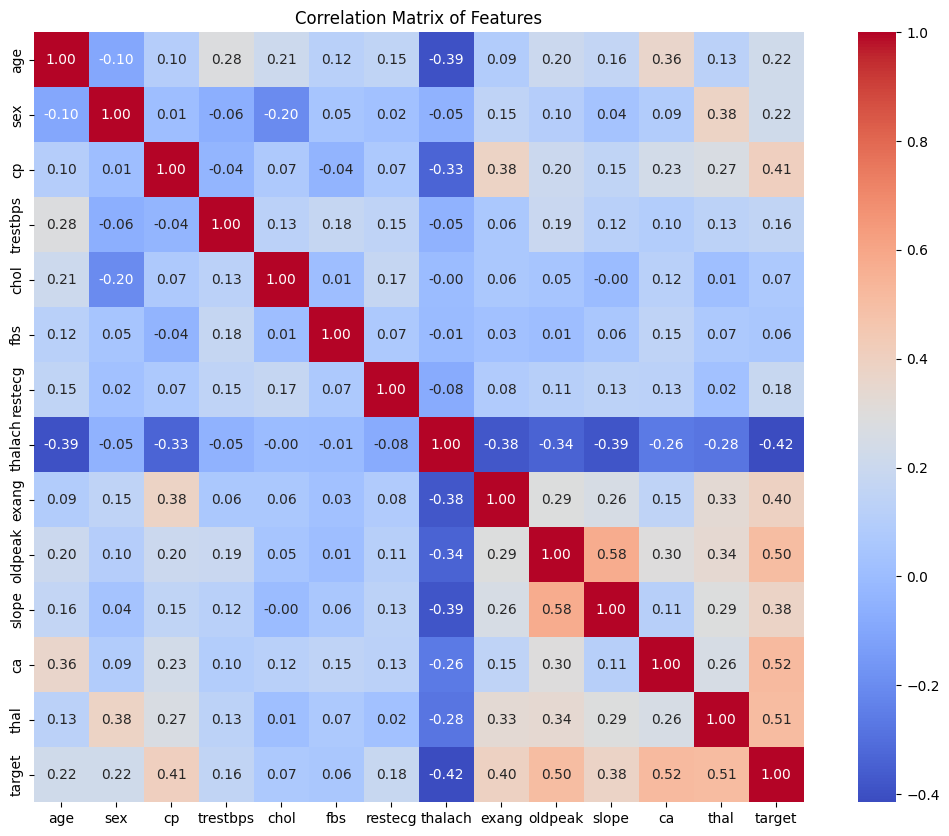

In [24]:
#Computes the correlation matrix
correlation_matrix = df.corr()

#Plots the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [25]:
# Set a correlation threshold
threshold = 0.4

# Find pairs of highly correlated features
highly_correlated_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold]

# Print highly correlated pairs
print("Highly correlated pairs:")
print(highly_correlated_pairs)

# Select features with high correlation to the target variable
target_variable = 'target'  # replace 'target' with your actual target column name
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)

# Keep features with high correlation to the target variable
selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

# Final selected features
final_selected_features = [feature for feature in selected_features]

print("Final selected features:")
print(final_selected_features)

# Create a new DataFrame with the selected features
df_selected = df[final_selected_features]


Highly correlated pairs:
[('cp', 'target'), ('thalach', 'target'), ('oldpeak', 'slope'), ('oldpeak', 'target'), ('slope', 'oldpeak'), ('ca', 'target'), ('thal', 'target'), ('target', 'cp'), ('target', 'thalach'), ('target', 'oldpeak'), ('target', 'ca'), ('target', 'thal')]
Final selected features:
['target', 'ca', 'thal', 'oldpeak', 'thalach', 'cp']


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import Binarizer

#Data Preprocessing 

#Handle missing values if any
df = df.dropna()

#Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

#Flatten target into 0/1
binarizer = Binarizer(threshold=0)
df['target'] = binarizer.fit_transform(df[['target']])
print(df.head())

#Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the data
scaler = StandardScaler()
# scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)


   age  trestbps  chol  thalach  oldpeak   ca  target  sex_0  sex_1   cp_1  \
0   63       145   233      150      2.3  0.0       0  False   True   True   
1   67       160   286      108      1.5  3.0       1  False   True  False   
2   67       120   229      129      2.6  2.0       1  False   True  False   
3   37       130   250      187      3.5  0.0       0  False   True  False   
4   41       130   204      172      1.4  0.0       0   True  False  False   

   ...  restecg_1  restecg_2  exang_0  exang_1  slope_1  slope_2  slope_3  \
0  ...      False       True     True    False    False    False     True   
1  ...      False       True    False     True    False     True    False   
2  ...      False       True    False     True    False     True    False   
3  ...      False      False     True    False    False    False     True   
4  ...      False       True     True    False     True    False    False   

   thal_3.0  thal_6.0  thal_7.0  
0     False      True     False  
